<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #5: TF-IDF
`Fecha de entrega: Septiembre 19, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import numpy as np
import pandas as pd
import os

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Punto 1: Pre-Procesamiento

- `[18 pts]` Leer el archivo `Princesas.csv` usando `pandas` y crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [2]:
ruta = os.chdir(r'C:\Users\Duber\Documents\NLP\Clase 5')
## 1. Dataframe
df = pd.read_csv('Princesas.csv')
df

,Princesa,Personalidad
0,Blancanieves,Blancanieves es una princesa de noble cuna que...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ..."
3,Bella,Bella es una muchacha que vive en la campiña f...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince..."
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil..."
6,Mulan,Mulan es atípica a los anteriores papeles feme...
7,Tiana,Es una joven camarera que sueña con ser dueña ...
8,Mérida,Mérida llama la atención por su característico...
9,Moana,"Moana, una joven de 16 años de edad, hija únic..."


In [33]:
# data

,Princesa,Personalidad
0,Blancanieves,Blancanieves es una princesa de noble cuna que...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ..."
3,Bella,Bella es una muchacha que vive en la campiña f...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince..."
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil..."
6,Mulan,Mulan es atípica a los anteriores papeles feme...
7,Tiana,Es una joven camarera que sueña con ser dueña ...
8,Mérida,Mérida llama la atención por su característico...
9,Moana,"Moana, una joven de 16 años de edad, hija únic..."


In [3]:
## 1. Data Procesada
df['Pre_Procesado'] = df['Personalidad']  ## Creación de columna de preprocesamiento
df['Pre_Procesado'] = df['Pre_Procesado'].apply(lambda x: re.sub(r"\W+", " ",x)) ##Quitamos caracteres
df['Pre_Procesado'] = df['Pre_Procesado'].apply(lambda x: re.sub(r"[0-9]", " ",x)) ##Quitamos Numeros
df['Pre_Procesado'] = df['Pre_Procesado'].str.lower()  ## Convertimos en minusculas
df['Pre_Procesado'] = df['Pre_Procesado'].str.split()  ## Separamos cada palabra para poder identificarlas y sacarlas si no estan en la lista
df['Pre_Procesado'] = df['Pre_Procesado'].apply(lambda x:[palabra for palabra in x if palabra not in stopwords_sp]) ## Quitamos Palabras vacias 
df['Pre_Procesado'] = df['Pre_Procesado'].apply(lambda x:" ".join([spanishStemmer.stem(y) for y in x]))
df


,Princesa,Personalidad,Pre_Procesado
0,Blancanieves,Blancanieves es una princesa de noble cuna que...,blancaniev princes nobl cun ve forz servidumbr...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...,cenicient inicial sirvient cas constant objet ...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ...",princes auror bell durmient hij unic rein flor...
3,Bella,Bella es una muchacha que vive en la campiña f...,bell muchach viv campiñ frances padr inventor ...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince...",introduj primer vez princes jasmin poc dias de...
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil...",nombr pocahont signif pequeñ silenci bas figur...
6,Mulan,Mulan es atípica a los anteriores papeles feme...,mul atip anterior papel femenin pelicul disney...
7,Tiana,Es una joven camarera que sueña con ser dueña ...,jov camarer sueñ ser dueñ propi restaur algun ...
8,Mérida,Mérida llama la atención por su característico...,mer llam atencion caracterist pel anaranj oscu...
9,Moana,"Moana, una joven de 16 años de edad, hija únic...",moan jov años edad hij unic sucesor import jef...


In [36]:
# data procesada

,Princesa,Personalidad,pre-procesado
0,Blancanieves,Blancanieves es una princesa de noble cuna que...,blancaniev princes nobl cun ve forz servidumbr...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...,cenicient inicial sirvient cas constant objet ...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ...",princes auror bell durmient hij unic rein flor...
3,Bella,Bella es una muchacha que vive en la campiña f...,bell muchach viv campiñ frances padr inventor ...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince...",introduj primer vez princes jasmin poc dias de...
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil...",nombr pocahont signif pequeñ silenci bas figur...
6,Mulan,Mulan es atípica a los anteriores papeles feme...,mul atip anterior papel femenin pelicul disney...
7,Tiana,Es una joven camarera que sueña con ser dueña ...,jov camarer sueñ ser dueñ propi restaur algun ...
8,Mérida,Mérida llama la atención por su característico...,mer llam atencion caracterist pel anaranj oscu...
9,Moana,"Moana, una joven de 16 años de edad, hija únic...",moan jov años edad hij unic sucesor import jef...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

In [4]:
## 2. Matrix TF-ODF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df.Pre_Procesado.values)

tfidf_matrix = pd.DataFrame(data=tfidf.toarray(), columns=tfidf_vect.get_feature_names())

tfidf_matrix = tfidf_matrix.T.round(3)
tfidf_matrix.columns = df.Princesa

tfidf_matrix

Princesa,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
abrum,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
abuel,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.102
acuerd,0.000,0.0,0.056,0.000,0.000,0.000,0.0,0.000,0.08,0.000
ademas,0.000,0.0,0.000,0.000,0.000,0.099,0.0,0.000,0.00,0.000
afortun,0.087,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.0,0.000,0.074,0.000,0.000,0.0,0.000,0.00,0.087
volunt,0.000,0.0,0.000,0.000,0.161,0.000,0.0,0.000,0.00,0.000
volv,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
vudu,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.122,0.00,0.000


In [44]:
# tfidf_matrix

,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
abrum,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
abuel,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.102
acuerd,0.000,0.0,0.056,0.000,0.000,0.000,0.0,0.000,0.08,0.000
ademas,0.000,0.0,0.000,0.000,0.000,0.099,0.0,0.000,0.00,0.000
afortun,0.087,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.0,0.000,0.074,0.000,0.000,0.0,0.000,0.00,0.087
volunt,0.000,0.0,0.000,0.000,0.161,0.000,0.0,0.000,0.00,0.000
volv,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
vudu,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.122,0.00,0.000


# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de las princesas
- `[2 pts]` ¿Cuáles son las princesas más parecidas?
- `[2 pts]` ¿Cuáles son las princesas más diferentes?

In [5]:
from sklearn.metrics.pairwise import cosine_distances

dist_cos = cosine_distances(tfidf_matrix.T.values)
dist_cos = pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = df.Princesa)
dist_cos


Princesa,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
Princesa,,,,,,,,,,
Blancanieves,0.000000,0.846420,0.842223,0.918112,0.935103,0.922165,0.884147,0.960082,0.985136,0.951298
Cenicienta,0.846420,0.000000,0.858412,0.947243,0.959209,0.960479,0.932663,0.918639,0.970839,0.974925
Aurora,0.842223,0.858412,0.000000,0.832503,0.937195,0.868994,0.919500,0.939231,0.940723,0.965930
Bella,0.918112,0.947243,0.832503,0.000000,0.888219,0.890513,0.882169,0.973338,0.943607,0.923546
Jasmín,0.935103,0.959209,0.937195,0.888219,0.000000,0.942753,0.935198,0.937868,0.972505,0.968929
Pocahontas,0.922165,0.960479,0.868994,0.890513,0.942753,0.000000,0.888844,0.968918,0.979646,0.936091
Mulan,0.884147,0.932663,0.919500,0.882169,0.935198,0.888844,0.000000,0.991170,0.987267,0.945844
Tiana,0.960082,0.918639,0.939231,0.973338,0.937868,0.968918,0.991170,0.000000,0.979275,0.971443
Mérida,0.985136,0.970839,0.940723,0.943607,0.972505,0.979646,0.987267,0.979275,0.000000,0.971818


In [47]:
# dist_cos

,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
Blancanieves,0.000000,0.846420,0.842223,0.918112,0.935103,0.922165,0.884147,0.960082,0.985136,0.951298
Cenicienta,0.846420,0.000000,0.858412,0.947243,0.959209,0.960479,0.932663,0.918639,0.970839,0.974925
Aurora,0.842223,0.858412,0.000000,0.832503,0.937195,0.868994,0.919500,0.939231,0.940723,0.965930
Bella,0.918112,0.947243,0.832503,0.000000,0.888219,0.890513,0.882169,0.973338,0.943607,0.923546
Jasmín,0.935103,0.959209,0.937195,0.888219,0.000000,0.942753,0.935198,0.937868,0.972505,0.968929
Pocahontas,0.922165,0.960479,0.868994,0.890513,0.942753,-0.000000,0.888844,0.968918,0.979646,0.936091
Mulan,0.884147,0.932663,0.919500,0.882169,0.935198,0.888844,0.000000,0.991170,0.987267,0.945844
Tiana,0.960082,0.918639,0.939231,0.973338,0.937868,0.968918,0.991170,0.000000,0.979275,0.971443
Mérida,0.985136,0.970839,0.940723,0.943607,0.972505,0.979646,0.987267,0.979275,0.000000,0.971818
Moana,0.951298,0.974925,0.965930,0.923546,0.968929,0.936091,0.945844,0.971443,0.971818,0.000000


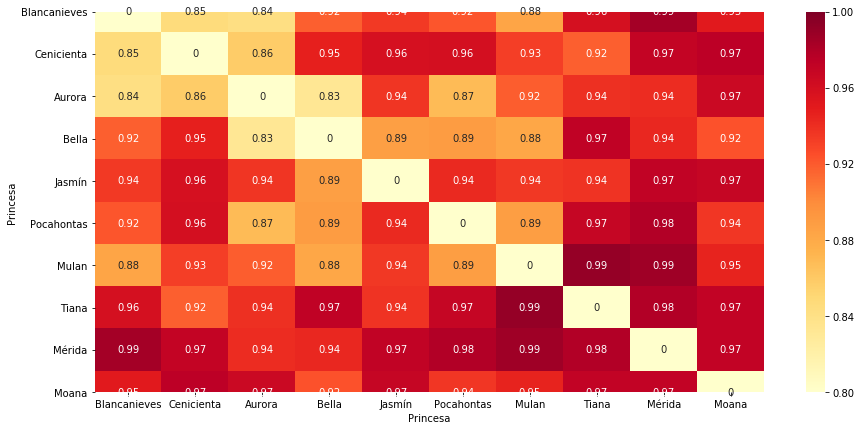

In [12]:
## 3.2 y 3.3
## Libreria para crear graficos, en este caso para hacer un mapa de calor y poder analisar la correlación de las princesas
import matplotlib.pyplot as plt
import seaborn as sns  ##Mapa de Calor

ta, size = plt.subplots(figsize=(15,7)) ## Tamaño del Grafico
sns.heatmap(dist_cos, center=0.90, vmin=0.80, vmax=1, cmap='YlOrRd', annot=True, ax=size) ## Mapa de Calor

## Si observamos el grafico, el color rojo mas fuerte nos dice que princesas estan mas relacionadas, en este caso:
## Blanca nieves y Mérida, Tiana y Mulan, Merida y Mulan con un 0,99 de relación
## y si observamos los colores mas claros omitiendo el "0", las mas diferentes son:
### Bella y Aurora, Aurora y Blancanieves, Blanca nieves y Cenicienta con una relación de 0.83, 0.84 y 0.85 respectivamente 
